<a href="https://colab.research.google.com/github/kunakl07/orcagsoc/blob/kunakl07-patch-1/Preprocessing_PCEN_Training_VGG16_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get -qq install awscli
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab07052019_PodCastRound2.tar.gz ./ 
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab09272017_PodCastRound3.tar.gz ./
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/test/OrcasoundLab09272017_Test.tar.gz ./
!tar -xzf OrcasoundLab09272017_PodCastRound3.tar.gz
!tar -xzf OrcasoundLab07052019_PodCastRound2.tar.gz
!tar -xzf OrcasoundLab09272017_Test.tar.gz
!pip -q install ketos==2.0.0b4
!pip -q install pysoundfile

Selecting previously unselected package sgml-base.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../00-sgml-base_1.29_all.deb ...
Unpacking sgml-base (1.29) ...
Selecting previously unselected package python3-yaml.
Preparing to unpack .../01-python3-yaml_3.12-1build2_amd64.deb ...
Unpacking python3-yaml (3.12-1build2) ...
Selecting previously unselected package python3-six.
Preparing to unpack .../02-python3-six_1.11.0-2_all.deb ...
Unpacking python3-six (1.11.0-2) ...
Selecting previously unselected package python3-dateutil.
Preparing to unpack .../03-python3-dateutil_2.6.1-1_all.deb ...
Unpacking python3-dateutil (2.6.1-1) ...
Selecting previously unselected package xml-core.
Preparing to unpack .../04-xml-core_0.18_all.deb ...
Unpacking xml-core (0.18) ...
Selecting previously unselected package docutils-common.
Preparing to unpack .../05-docutils-common_0.14+dfsg-3_all.deb ...
Unpacking docutils-common (0.14+dfsg-3) ...
Selecting prev

In [0]:
import pandas as pd
from ketos.data_handling import selection_table as sl
import ketos.data_handling.database_interface as dbi
from ketos.data_handling.parsing import load_audio_representation
from ketos.audio.spectrogram import MagSpectrogram
from ketos.data_handling.parsing import load_audio_representation

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [0]:
annot_train2 = pd.read_csv('/content/podcast2.tsv', sep='\t')
#df2 = annot_train2
#df3 = annot_train3


In [0]:
annot_train3 = pd.read_csv('/content/podcast3.tsv', sep='\t')


In [0]:
annot_test = pd.read_csv('/content/v10_test.tsv', sep='\t')
#dftest = annot_test
# where'd this come from?
#I uploaded this from the local files
#annot_val=pd.read_csv('/content/val_pod3.tsv', sep='\t')
#dfval=annot_val
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs


In [0]:
annot_train2["end"] = annot_train2["start"] + annot_train2["duration_s"]
annot_train2.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,52.215625
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,42.704861
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,39.089410
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,45.512153
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,48.021701


In [0]:
annot_train3["end"] = annot_train3["start"] + annot_train3["duration_s"]
annot_train3.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,7.856295
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,15.167882
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,31.637326
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,45.103819
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,50.344097


In [0]:
annot_test["end"] = annot_test["start"] + annot_test["duration_s"]
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,14.093564
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,17.759901
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,56.350000
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,61.250000
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs,7.826389


In [0]:
map_to_ketos_annot_std ={'wav_filename': 'filename'} 
std_annot_train2 = sl.standardize(table=annot_train2, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)
#std_annot_val = sl.standardize(table=annot_val, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)

#annot_std, label_dict = sl.standardize(annot_train, mapper={'wav_filename':'filename', 'start_time':'start_time_s', 'end':'end','label':'label'}, return_label_dict=True)


In [0]:
std_annot_train3 = sl.standardize(table=annot_train3, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)


In [0]:
std_annot_test = sl.standardize(table=annot_test, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)


In [0]:
std_annot_train2.head()


start  label        end
filename            annot_id                             
1562337136_0004.wav 0         49.765625      1  52.215625
                    1         41.046007      1  42.704861
                    2         37.345486      1  39.089410
                    3         42.917535      1  45.512153
                    4         45.980035      1  48.021701

In [0]:
std_annot_train3.head()

start  label        end
filename                        annot_id                             
OS_9_27_2017_08_14_00__0002.wav 0          6.110451      1   7.856295
OS_9_27_2017_08_14_00__0004.wav 0         12.717882      1  15.167882
                                1         29.825347      1  31.637326
                                2         43.504514      1  45.103819
                                3         48.404514      1  50.344097

In [0]:
std_annot_test.head()

start  label        end
filename                        annot_id                             
OS_9_27_2017_08_14_00__0001.wav 0         11.643564      1  14.093564
                                1         15.594059      1  17.759901
                                2         53.900000      1  56.350000
                                3         59.781486      1  61.250000
OS_9_27_2017_08_19_00__0002.wav 0          6.592882      1   7.826389

In [0]:
std_annot_train2.to_csv('standardized_train2.tsv', mode='a', sep='\t',header=False)
std_annot_train3.to_csv('standardized_train3.tsv', mode='a', sep='\t',header=False)
std_annot_test.to_csv('standardized_test.tsv', mode='a', sep='\t',header=False)

In [0]:
%cd /content/

/content


In [0]:
annot_id2 = pd.read_csv('/content/standardized_train2.tsv', sep='\t')


In [0]:
annot_id3 = pd.read_csv('/content/standardized_train3.tsv', sep='\t')
annot_idtest = pd.read_csv('/content/standardized_test.tsv', sep='\t')
#annot_val=pd.read_csv('/content/standardized_val.tsv', sep='\t')

In [0]:

file_name_pos_train2=annot_train2.iloc[:,0].values
start_time_pos_train2=annot_train2.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_train2[0]))
print(start_time_pos_train2[0])


1562337136_0004.wav
49.765625


In [0]:
annot_train2.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,52.215625
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,42.704861
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,39.089410
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,45.512153
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,48.021701


In [0]:

file_name_pos_train3=annot_train3.iloc[:,0].values
start_time_pos_train3=annot_train3.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_train3[0]))
print(start_time_pos_train3[0])


OS_9_27_2017_08_14_00__0002.wav
6.1104513064133


In [0]:
annot_train3.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,7.856295
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,15.167882
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,31.637326
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,45.103819
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,50.344097


In [0]:
!pip install pydub

In [0]:
!pwd

/content


In [0]:
%cd /content/Round2_OS_07_05/wav

/content/Round2_OS_07_05/wav


In [0]:
file_name_pos_train2[:10]


array(['1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0006.wav',
       '1562337136_0006.wav', '1562337136_0006.wav'], dtype=object)

In [0]:
!mkdir pod_calls

In [0]:
!pwd

/content/Round2_OS_07_05/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_train2:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_train2[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls/calls{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

49765.625
41046.0069444444
37345.4861111111
42917.534722222204
45980.034722222204
52700.5208333333
55295.1388888889
1147.64052741152
26115.197779319897
29995.0728660652
34725.0520471894
52485.426786953496
36554.4760582929
13883.906030855502
17708.3800841515
21964.095371669
19672.159887798
27846.966527196604
29329.9511854951
34229.951185495105
56773.709902370996
37544.4560669456
46172.41980474201
6233.23983169705
42204.9438990182
56264.09537166899
58972.44491458839
13916.549789621302
7261.1576011157595
8286.26220362622
10550.0348675035
11318.8633193863
34554.5676429568
52237.62203626221
53647.1408647141
14451.171875
47755.859375
56895.5078125
31508.298465829805
37607.6708507671
1250.0
58064.3398354815
13398.4375
27945.3125
17035.15625
38233.3984375
46798.828125
57363.1450488145
11881.54296875
20336.9140625
34300.0
41412.04351204351
46430.0699300699
51488.28125
53785.15625
57134.765625
129.12860154603
5552.52986647927
8522.487702037952
21091.0049191848
24534.434293745606
30216.0927617709

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
def apply_per_channel_energy_norm(data, sampling_rate):
    '''Compute Per-Channel Energy Normalization (PCEN)'''
    S = librosa.feature.melspectrogram(
        data, sr=sampling_rate, power=1)  # Compute mel-scaled spectrogram
    # Convert an amplitude spectrogram to dB-scaled spectrogram
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    pcen_S = librosa.core.pcen(S)
    return pcen_S

In [0]:
def wavelet_denoising(data):
    '''
    Wavelet Denoising using scikit-image
    NOTE: Wavelet denoising is an effective method for SNR improvement in environments with
              wide range of noise types competing for the same subspace.
    '''
    sigma_est = estimate_sigma(data, multichannel=False, average_sigmas=True)
    im_bayes = denoise_wavelet(data, multichannel=False, convert2ycbcr=False, method='BayesShrink',
                               mode='soft')
    im_visushrink = denoise_wavelet(data, multichannel=False, convert2ycbcr=False, method='VisuShrink',
                                    mode='soft')

    # VisuShrink is designed to eliminate noise with high probability, but this
    # results in a visually over-smooth appearance. Here, we specify a reduction
    # in the threshold by factors of 2 and 4.
    im_visushrink2 = denoise_wavelet(data, multichannel=False, convert2ycbcr=False, method='VisuShrink',
                                     mode='soft', sigma=sigma_est / 2)
    im_visushrink4 = denoise_wavelet(data, multichannel=False, convert2ycbcr=False, method='VisuShrink',
                                     mode='soft', sigma=sigma_est / 4)
    return im_bayes

In [0]:
def plot_and_save(denoised_data, f_name):

    fig, ax = plt.subplots()

    i = 0
    # Add this line to show plots else ignore warnings
    # plt.ion()

    ax.imshow(denoised_data)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.set_size_inches(10, 10)
    fig.savefig(
        f"{f_name[:-4]}" + "_{:04d}.png".format(i),
        dpi=80,
        bbox_inches="tight",
        quality=95,
        pad_inches=0.0)

    fig.canvas.draw()
    fig.canvas.flush_events()
    i += 1
    plt.close(fig)

In [0]:
import librosa
from skimage.restoration import (denoise_wavelet, estimate_sigma)
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data, sr = librosa.core.load(path='/content/Round2_OS_07_05/wav/pod_calls/calls107.wav', res_type='kaiser_best')


In [0]:
sr

22050

In [0]:
data, sr = librosa.core.load(path='/content/Round2_OS_07_05/wav/1562337136_0004.wav', res_type='kaiser_best')


In [0]:
sr

22050

In [0]:
data

array([-0.00666102, -0.00952134, -0.01496134, ...,  0.01400696,
        0.00807553,  0.        ], dtype=float32)

In [0]:
pcen = apply_per_channel_energy_norm(data, sr)
pcen


array([[2.76697131e+00, 1.54184360e+00, 1.32452194e+00, ...,
        2.61613112e-01, 3.05828607e-01, 9.81806862e-01],
       [2.85979631e+00, 1.87839775e+00, 1.42626374e+00, ...,
        3.02510252e-01, 3.08380263e-01, 3.44397207e-01],
       [2.84241384e+00, 1.81329061e+00, 1.38287194e+00, ...,
        2.97221207e-01, 2.96974447e-01, 3.27089415e-01],
       ...,
       [1.65921741e+00, 8.27814681e-01, 2.74367193e-03, ...,
        4.39681795e-03, 1.82383133e-01, 1.66875786e+00],
       [1.45237596e+00, 7.32392022e-01, 1.45084523e-03, ...,
        1.73407788e-03, 2.58214255e-01, 1.88823330e+00],
       [1.84815777e+00, 9.08520535e-01, 6.71244236e-04, ...,
        1.46574397e-03, 2.93142044e-01, 1.95631419e+00]])

In [0]:
denoised_data = wavelet_denoising(pcen)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigm

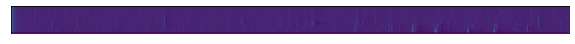

In [0]:
plot_and_save(pcen, f_name='/content/Round2_OS_07_05/wav/pod_calls/calls106.wav')

In [0]:
%pwd

'/content'

In [0]:
%cd /content/

/content


In [0]:
import cv2

In [0]:
img=cv2.imread('/content/Round2_OS_07_05/wav/pod_calls/calls106_0000.png')

In [0]:
img.shape

(94, 1863, 3)

In [0]:
%cd /content/Round3_OS_09_27_2017/wav 

/content/Round3_OS_09_27_2017/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_train3:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_train3[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls/calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

6110.451306413301
12717.881944444402
29825.347222222197
43504.5138888889
48404.5138888889
3530.3819444444403
18842.8819444444
21692.7083333333
38281.25
45980.034722222204
54104.1666666667
9311.163895486938
19058.7885985748
22259.501187648504
32977.0387965162
30880.2083333333
11994.791666666699
36111.9791666667
37898.4375
45894.965277777796
49042.534722222204
11532.2265625
16365.234375
20145.5078125
39094.7265625
5790.0390625
8326.171875
2631.8359375
24500.0
38519.444444444394
53729.8611111111
56605.208333333394
5869.79166666667
2807.2916666666697
0.0
33087.6088677751
36750.0
50115.3998416469
23132.4228028504
25557.2050673001
29776.326207442606
40833.3333333333
45440.41963578779
47671.2193190816
0.0
19600.0
26093.3566433566
30351.8259518259
37368.6868686869
44195.1825951826
6139.27738927739
12135.7808857809
47591.297591297596
50351.592851592904
53545.8984375
57134.765625
59240.234375
17728.740157480304
20564.5669291339
24500.0
26950.0
50061.0236220473
56784.05511811029
59468.52494475739

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:

import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [0]:
!pwd

/content/Round3_OS_09_27_2017/wav


In [0]:
!pwd

/content


In [0]:
%cd /content/Round2_OS_07_05

/content/Round2_OS_07_05


In [0]:
!mkdir train

In [0]:
!mkdir test

In [0]:
%cd train

/content/Round2_OS_07_05/train


In [0]:
!mkdir calls

In [0]:
i!mkdir nocalls

In [0]:
%cd /content/Round2_OS_07_05/test

/content/Round2_OS_07_05/test


In [0]:
!mkdir calls

In [0]:
!mkdir nocalls

In [0]:
%cd /content/Round2_OS_07_05/train/calls

/content/Round2_OS_07_05/train/calls


In [0]:
%pwd

'/content/Round2_OS_07_05/train/calls'

In [0]:
import os

In [0]:
basePath = r"/content/Round2_OS_07_05/"
plotPath = join(basePath,"train/calls")
folderpath = join(basePath, "wav/pod_calls")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx,file in enumerate(onlyfiles):
    #data, samplerate = sf.read(join(folderpath, file))
   
    data, sr = librosa.core.load(
                    os.path.join(folderpath, file), res_type='kaiser_best')
    print(data)
    print(sf)
    f_name = os.path.basename(file)
    pcen_S = apply_per_channel_energy_norm(data, sr)
    plot_and_save(pcen_S, f_name)



In [0]:
positives_train2 = sl.select(annotations=std_annot_train2, length=3.0)
positives_train2.head()


label      start        end
filename            sel_id                             
1562337136_0004.wav 0           1  49.300382  52.300382
                    1           1  40.069579  43.069579
                    2           1  36.913127  39.913127
                    3           1  42.899453  45.899453
                    4           1  45.168786  48.168786

In [0]:
positives_train3 = sl.select(annotations=std_annot_train2, length=3.0)
positives_train3.head()


label      start        end
filename            sel_id                             
1562337136_0004.wav 0           1  49.441825  52.441825
                    1           1  41.026739  44.026739
                    2           1  36.126491  39.126491
                    3           1  42.695201  45.695201
                    4           1  45.872993  48.872993

In [0]:
file_durations_train2 = sl.file_duration_table('/content/Round2_OS_07_05/wav')


In [0]:
negatives_train2=sl.create_rndm_backgr_selections(annotations=std_annot_train2, files=file_durations_train2, length=3.0, num=len(positives_train2), trim_table=True)
negatives_train2

start        end  label
filename            sel_id                             
1562337136_0004.wav 0        6.415466   9.415466      0
                    1        7.333981  10.333981      0
                    2       10.595708  13.595708      0
                    3       13.590522  16.590522      0
                    4       16.883556  19.883556      0
...                               ...        ...    ...
1562344334_001c.wav 0        9.020682  12.020682      0
                    1       26.118420  29.118420      0
                    2       36.462061  39.462061      0
                    3       47.155750  50.155750      0
                    4       50.294327  53.294327      0

[357 rows x 3 columns]

In [0]:
positives_train33 = sl.select(annotations=std_annot_train3, length=3.0)
#positives_train2
file_durations_train33 = sl.file_duration_table('/content/Round3_OS_09_27_2017/wav')
negatives_train33=sl.create_rndm_backgr_selections(annotations=std_annot_train3, files=file_durations_train33, length=3.0, num=len(positives_train33), trim_table=True)
#negatives_train3
#selections_train3 = positives_train3.append(negatives_train3, sort=False)
negatives_train33.head()


start        end  label
filename                        sel_id                             
OS_9_27_2017_08_03_00__0002.wav 0        5.922882   8.922882      0
                                1       17.982651  20.982651      0
                                2       26.788917  29.788917      0
                                3       41.946883  44.946883      0
                                4       48.569183  51.569183      0

In [0]:
negatives_train2[0:10]

start        end  label
filename            sel_id                             
1562337136_0004.wav 0        6.415466   9.415466      0
                    1        7.333981  10.333981      0
                    2       10.595708  13.595708      0
                    3       13.590522  16.590522      0
                    4       16.883556  19.883556      0
                    5       17.139695  20.139695      0
                    6       18.684864  21.684864      0
                    7       24.548517  27.548517      0
                    8       57.908943  60.908943      0
1562337136_0005.wav 0        0.512560   3.512560      0

In [0]:
!pwd

/content/Round2_OS_07_05/train/calls


In [0]:
%cd /content/OrcasoundLab09272017_Test/

/content/OrcasoundLab09272017_Test


In [0]:
negatives_train2.to_csv('negative2.tsv', mode='a', sep='\t',header=False)
negatives_train33.to_csv('negative3.tsv', mode='a', sep='\t',header=False)

In [0]:
negatives_train2save=pd.read_csv('/content/OrcasoundLab09272017_Test/negative2.tsv',sep='\t')
negatives_train33save=pd.read_csv('/content/OrcasoundLab09272017_Test/negative3.tsv',sep='\t')

In [0]:

file_name_neg_train2save=negatives_train2save.iloc[:,0].values
start_time_neg_train2save=negatives_train2save.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_neg_train2save[:5]))
print(start_time_neg_train2save[:5])


['1562337136_0004.wav' '1562337136_0004.wav' '1562337136_0004.wav'
 '1562337136_0004.wav' '1562337136_0004.wav']
[ 7.33398056 10.59570776 13.59052192 16.88355563 17.13969501]


In [0]:
negatives_train2save.head()

,1562337136_0004.wav,0,6.415465642193684,9.415465642193684,0.1
0,1562337136_0004.wav,1,7.333981,10.333981,0
1,1562337136_0004.wav,2,10.595708,13.595708,0
2,1562337136_0004.wav,3,13.590522,16.590522,0
3,1562337136_0004.wav,4,16.883556,19.883556,0
4,1562337136_0004.wav,5,17.139695,20.139695,0


In [0]:

file_name_neg_train3save= negatives_train33save.iloc[:,0].values
start_time_neg_train3=negatives_train33save.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_neg_train3save[0]))
print(start_time_neg_train3[0])


OS_9_27_2017_08_03_00__0002.wav
17.982650564935067


In [0]:
negatives_train33save.head()

,OS_9_27_2017_08_03_00__0002.wav,0,5.92288222051245,8.922882220512449,0.1
0,OS_9_27_2017_08_03_00__0002.wav,1,17.982651,20.982651,0
1,OS_9_27_2017_08_03_00__0002.wav,2,26.788917,29.788917,0
2,OS_9_27_2017_08_03_00__0002.wav,3,41.946883,44.946883,0
3,OS_9_27_2017_08_03_00__0002.wav,4,48.569183,51.569183,0
4,OS_9_27_2017_08_03_00__0003.wav,0,3.811209,6.811209,0


In [0]:
%cd /content/Round2_OS_07_05/wav

/content/Round2_OS_07_05/wav


In [0]:
!mkdir pod_calls_neg

In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_neg_train2save:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_neg_train2save[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls_neg/neg_calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

7333.980555324986
10595.707764521481
13590.521924858664
16883.555630229166
17139.69500933134
18684.864230646403
24548.51686800923
57908.94330123825
512.5598285790005
3053.101296111344
5475.231758649344
10251.054628716927
16508.580774026046
17015.93059040563
28658.71459653809
33424.786930572154
35324.4961996965
52771.215470972136
52911.35914706601
56056.8970187253
5971.530324009009
10424.218932456937
20362.316866589197
48177.71459000201
55161.46409463642
5441.92865634875
24956.09991389935
30560.51734379298
35720.30860802192
36474.18134367649
36654.684277646105
37336.88958456339
46071.791574375275
49590.78282277528
50126.55247250132
51776.49943846774
54054.17348814365
4653.604863252298
10761.193057772856
12210.902397333797
50271.758800998214
51136.19076260767
24306.407992192588
28888.625106669453
31759.997823985486
33149.1955163811
50682.265423949844
10268.448738537418
15274.987665478533
22230.051532154503
23058.89339904053
33340.958747224024
34863.53409568949
49742.177604853794
52055.31

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round3_OS_09_27_2017/wav

/content/Round3_OS_09_27_2017/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_neg_train3save:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_neg_train3[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls_neg/neg_calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

17982.650564935066
26788.916789539788
41946.8827968797
48569.182760737385
3811.2093918274536
4662.872330471202
16664.090224139003
19220.861467783736
23734.230852948298
24918.36648250375
25623.402803727808
41415.963767367
52057.66064585161
52479.00101742994
4483.068100555016
5398.657595232066
12219.176203793411
28630.68538221986
48274.1095342177
56669.55125426887
21156.566558476727
23147.48317857197
44114.95328459426
44171.59344976464
12817.028974394163
22569.255194651614
29193.58272034037
39764.274227311544
44609.25820026523
47218.55729244084
51903.23291280714
4415.179638316943
10642.40817030742
10867.081971325431
12025.549011804174
19899.906069812343
28385.462567381073
32868.891995824924
37016.16431237119
11468.440705441992
26822.99004773444
46080.93372095942
52113.54478869221
3658.293497103045
5995.424696688247
24546.55461360278
48432.088573578476
49117.27169983072
55034.42886959334
25659.17418622644
34503.82899847637
14268.052939313064
55255.876760848994
15681.100864600807
20082.936

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round2_OS_07_05/train/nocalls

/content/Round2_OS_07_05/train/nocalls


In [0]:
%pwd

'/content/Round2_OS_07_05/train/nocalls'

In [0]:
basePath = r"/content/Round2_OS_07_05/"
plotPath = join(basePath,"train/nocalls")
folderpath = join(basePath, "wav/pod_calls_neg")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx,file in enumerate(onlyfiles):
    #data, samplerate = sf.read(join(folderpath, file))
   
    data, sr = librosa.core.load(
                    os.path.join(folderpath, file), res_type='kaiser_best')
    print(data)
    print(sf)
    f_name = os.path.basename(file)
    pcen_S = apply_per_channel_energy_norm(data, sr)
    plot_and_save(pcen_S, f_name)



In [0]:
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs


#Repeating the same steps for test case

In [0]:

file_name_pos_test=annot_test.iloc[:,0].values
start_time_pos_test=annot_test.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_test[:5]))
print(start_time_pos_test[:5])


['OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_19_00__0002.wav']
[11.64356436 15.59405941 53.9        59.7814864   6.59288194]


In [0]:

!pwd

In [0]:
%cd /content/OrcasoundLab09272017_Test/

/content/OrcasoundLab09272017_Test


In [0]:
!mkdir test_positive_calls

In [0]:
%cd /content/OrcasoundLab09272017_Test/wav

/content/OrcasoundLab09272017_Test/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_test:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_test[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/OrcasoundLab09272017_Test/test_positive_calls/calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

11643.564359999998
15594.05941
53900.0
59781.486399999994
6592.881944
23011.28472
29519.09722
50769.44444
20709.25197
22725.19685
41650.0
43280.118109999996
52125.19685
54671.65354
56687.59843
60295.078740000004
0.0
2666.724257
4688.355218
7815.618521
16091.77609
18457.118179999998
20991.77609
23187.802349999998
28045.473390000003
30011.23013
31704.38839
47311.921220000004
51957.94748
60069.86869
4432.118056
7945.486111
10506.07639
12760.41667
16299.30556
17685.9375
20331.59722
23351.5625
33253.64583
34538.19444
38221.70139
46550.0
49042.534719999996
54027.60417
578.472222
5282.8125
12888.02083
19217.1875
25010.416670000002
34300.0
36750.0
49000.0
1745.84323
6401.4251779999995
9800.0
18727.07838
22971.41726
28307.878070000002
29496.99129
32577.434680000002
35595.80364
49000.0
51207.52177
52930.08709
935.7638890000001
3360.2430560000003
5486.979167
7350.0
10165.79861
12250.0
14631.94444
16767.1875
18800.34722
20842.013890000002
22245.65972
24500.0
25988.71528
27052.083329999998
29697.74

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round2_OS_07_05/test/calls

/content/Round2_OS_07_05/test/calls


In [0]:
basePath = r"/content/OrcasoundLab09272017_Test/"
plotPath = join(basePath,"test/calls")
folderpath = join(basePath, "test_positive_calls")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx,file in enumerate(onlyfiles):
    #data, samplerate = sf.read(join(folderpath, file))
   
    data, sr = librosa.core.load(
                    os.path.join(folderpath, file), res_type='kaiser_best')
    print(data)
    print(sf)
    f_name = os.path.basename(file)
    pcen_S = apply_per_channel_energy_norm(data, sr)
    plot_and_save(pcen_S, f_name)



[-4.1970448e-03 -7.1946920e-06  3.6580861e-03 ...  1.1761654e-02
  2.9142698e-02  0.0000000e+00]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[-0.01602261 -0.01415209 -0.00050971 ...  0.02715349  0.03144559
  0.02818443]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[-0.024018   -0.02192164 -0.01618959 ...  0.0046659   0.01294718
  0.01323595]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[-0.00727812 -0.00240553  0.00694275 ... -0.01852295  0.04597739
  0.03861324]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[-0.00673711 -0.00407886  0.00233068 ... -0.00852599 -0.01206935
 -0.00767228]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[-0.0159752  -0.01494568 -0.03494105 ...  0.01941472  0.01562248
  0.05563843]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[ 0.0051736   0.00060869  0.

In [0]:
positives_test = sl.select(annotations=std_annot_test, length=3.0)
#positives_train2
file_durations_test = sl.file_duration_table('/content/OrcasoundLab09272017_Test/wav')
negatives_test=sl.create_rndm_backgr_selections(annotations=std_annot_test, files=file_durations_test, length=3.0, num=len(positives_test), trim_table=True)
#negatives_train3
#selections_test = positives_test.append(negatives_test, sort=False)



In [0]:
%cd /content/

/content


In [0]:
std_annot_test.head()

start  label        end
filename                        annot_id                             
OS_9_27_2017_08_14_00__0001.wav 0         11.643564      1  14.093564
                                1         15.594059      1  17.759901
                                2         53.900000      1  56.350000
                                3         59.781486      1  61.250000
OS_9_27_2017_08_19_00__0002.wav 0          6.592882      1   7.826389

In [0]:
positives_test.head()

label      start        end
filename                        sel_id                             
OS_9_27_2017_08_14_00__0001.wav 0           1  11.241560  14.241560
                                1           1  15.473955  18.473955
                                2           1  53.411654  56.411654
                                3           1  58.432518  61.432518
OS_9_27_2017_08_19_00__0002.wav 0           1   6.053825   9.053825

In [0]:
negatives_test.to_csv('negg.tsv', mode='a', sep='\t',header=False)


In [0]:
neg=pd.read_csv('/content/negg.tsv',sep='\t')
neg[:10]

,OS_9_27_2017_08_14_00__0001.wav,0,18.288292020700734,21.288292020700734,0.1
0,OS_9_27_2017_08_14_00__0001.wav,1,31.439210,34.439210,0
1,OS_9_27_2017_08_14_00__0001.wav,2,36.528171,39.528171,0
2,OS_9_27_2017_08_14_00__0001.wav,3,36.876918,39.876918,0
3,OS_9_27_2017_08_14_00__0001.wav,4,41.919872,44.919872,0
4,OS_9_27_2017_08_14_00__0001.wav,5,45.698330,48.698330,0
5,OS_9_27_2017_08_19_00__0002.wav,0,16.977019,19.977019,0
6,OS_9_27_2017_08_19_00__0002.wav,1,45.137832,48.137832,0
7,OS_9_27_2017_08_19_00__0002.wav,2,53.013490,56.013490,0
8,OS_9_27_2017_08_19_00__0002.wav,3,54.952221,57.952221,0
9,OS_9_27_2017_08_25_00__0003.wav,0,3.917401,6.917401,0


In [0]:

file_name_nn_test=neg.iloc[:,0].values
start_time_nn_test=neg.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_nn_test[:5]))
print(start_time_nn_test[:5])


['OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav']
[31.43920961 36.52817089 36.87691843 41.91987249 45.69833017]


In [0]:
%cd /content/OrcasoundLab09272017_Test/

/content/OrcasoundLab09272017_Test


In [0]:
!mkdir test_neg_call

In [0]:
%cd /content/OrcasoundLab09272017_Test/wav/

/content/OrcasoundLab09272017_Test/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_nn_test:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_nn_test[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/OrcasoundLab09272017_Test/test_neg_calls/calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

31439.209608250643
36528.17088957272
36876.918433412146
41919.872488873676
45698.33017495836
16977.019289766955
45137.83230080077
53013.49028176917
54952.22097751234
3917.401424875351
6368.772716776379
7325.332214865668
16481.422148305053
28442.857695957853
33697.69816308002
36243.99937050103
34185.768784181906
55630.59275913002
29208.84843116659
35365.544137164536
39950.04905727581
43493.62910370797
48094.84851083045
56072.314951257504
20893.488823266187
27296.196156946397
42311.02105634825
56895.767996806404
25049.86562915053
40535.088073785635
28963.468129323806
40067.79025849244
44397.64313429657
2707.268316262798
12555.017681517713
31715.456029988898
55572.16817314554
58191.27187310447
5672.3024709182255
6068.262196812498
8823.339787804456
35108.48800601911
48213.705554219356
52936.13593383259
53057.05604719583
54583.485463346384
15081.051259718153
23295.9837329945
29366.137910109162
32422.75130895473
35970.22432236781
57896.4728470595
3799.316507597041
22319.44777950548
36200.794

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round2_OS_07_05/test/nocalls

/content/Round2_OS_07_05/test/nocalls


In [0]:
basePath = r"/content/OrcasoundLab09272017_Test/"
plotPath = join(basePath,"test/nocalls")
folderpath = join(basePath, "test_neg_calls")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx,file in enumerate(onlyfiles):
    #data, samplerate = sf.read(join(folderpath, file))
   
    data, sr = librosa.core.load(
                    os.path.join(folderpath, file), res_type='kaiser_best')
    print(data)
    print(sf)
    f_name = os.path.basename(file)
    pcen_S = apply_per_channel_energy_norm(data, sr)
    plot_and_save(pcen_S, f_name)



[0.01333933 0.02547777 0.0266127  ... 0.01987019 0.01725258 0.01143457]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[ 0.01054645  0.0081162  -0.00297587 ... -0.01420617 -0.02018705
 -0.0174028 ]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[0.00067582 0.00365284 0.00448936 ... 0.01786097 0.01925825 0.01431548]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[ 0.00918252  0.00280738 -0.00102995 ...  0.02309442  0.02500923
  0.0228591 ]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[ 0.03016304  0.03062298  0.02607084 ... -0.00449442 -0.0048933
  0.00782643]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[ 0.00658281  0.00039624 -0.00859188 ...  0.00624223  0.00469797
  0.00284998]
<module 'soundfile' from '/usr/local/lib/python3.6/dist-packages/soundfile.py'>
[7.9411991e-05 1.3462622e-02 1.6273091e-02 ... 6.0976380e-03 

In [0]:
!zip -r /content/pcentrainsave.zip /content/Round2_OS_07_05/train

  adding: content/Round2_OS_07_05/train/ (stored 0%)
  adding: content/Round2_OS_07_05/train/nocalls/ (stored 0%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3390_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3160_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3299_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3392_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3380_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3376_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3258_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3333_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3273_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod321_0000.png (deflated 7

In [0]:
!zip -r /content/pcentest.zip /content/Round2_OS_07_05/test

  adding: content/Round2_OS_07_05/test/ (stored 0%)
  adding: content/Round2_OS_07_05/test/nocalls/ (stored 0%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod355_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod338_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod347_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod336_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod339_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod378_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod388_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod315_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod37_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod391_0000.png (deflated 7%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod350

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [0]:
train_path='/content/Round2_OS_07_05/train'
test_path='/content/Round2_OS_07_05/test'

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'])
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'])


Found 1214 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [0]:
import keras

In [0]:
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 17s 0us/step


In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
    layer.trainable=False

In [0]:
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
import tensorflow as tf

In [0]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
	metrics=["accuracy"])

In [0]:
%cd /content/

/content


In [0]:
model.fit_generator(train_batches,steps_per_epoch=200,epochs=250,verbose=2)
model.save('PCEN_VGG_Srkw.h5')
from google.colab import files
files.download('PCEN_VGG_Srkw.h5') 

Epoch 1/250
 - 71s - loss: 0.0034 - accuracy: 1.0000
Epoch 2/250
 - 71s - loss: 0.0034 - accuracy: 1.0000
Epoch 3/250
 - 70s - loss: 0.0031 - accuracy: 1.0000
Epoch 4/250
 - 67s - loss: 0.0026 - accuracy: 1.0000
Epoch 5/250
 - 67s - loss: 0.0025 - accuracy: 1.0000
Epoch 6/250
 - 70s - loss: 0.0022 - accuracy: 1.0000
Epoch 7/250
 - 70s - loss: 0.0021 - accuracy: 1.0000
Epoch 8/250
 - 67s - loss: 0.0018 - accuracy: 1.0000
Epoch 9/250
 - 70s - loss: 0.0022 - accuracy: 1.0000
Epoch 10/250
 - 71s - loss: 0.0019 - accuracy: 1.0000
Epoch 11/250
 - 71s - loss: 0.0015 - accuracy: 1.0000
Epoch 12/250
 - 71s - loss: 0.0014 - accuracy: 1.0000
Epoch 13/250
 - 71s - loss: 0.0012 - accuracy: 1.0000
Epoch 14/250
 - 71s - loss: 0.0012 - accuracy: 1.0000
Epoch 15/250
 - 71s - loss: 0.0010 - accuracy: 1.0000
Epoch 16/250
 - 72s - loss: 9.9557e-04 - accuracy: 1.0000
Epoch 17/250
 - 71s - loss: 9.7710e-04 - accuracy: 1.0000
Epoch 18/250
 - 71s - loss: 8.8034e-04 - accuracy: 1.0000
Epoch 19/250
 - 71s - los

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


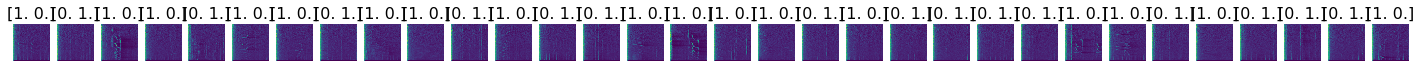

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

In [0]:
predictions=model.predict_generator(test_batches,steps=225,verbose=0)

In [0]:
predictions[0:10]

array([[9.99991298e-01, 8.71824795e-06],
       [2.13050004e-03, 9.97869492e-01],
       [9.99998331e-01, 1.63876246e-06],
       [1.12074837e-02, 9.88792479e-01],
       [6.36980589e-03, 9.93630230e-01],
       [5.06480597e-02, 9.49351966e-01],
       [5.92560042e-03, 9.94074404e-01],
       [1.10184075e-02, 9.88981605e-01],
       [9.97266293e-01, 2.73372536e-03],
       [9.99738157e-01, 2.61883310e-04]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


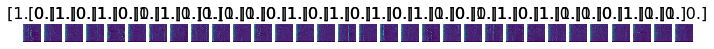

In [0]:
# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)